In [1]:
from scipy.stats import binom, norm
import math
import pandas as pd
import seaborn as sns
import numpy as np

# Binomial

- Suponha que na minha loja 10% de todos os pedidos são devolvidos a cada semana. Se houver alta probabilidade de ter 3 ou mais devoluções por semana, precisamos contratar um assistente temporário. Suponha que naquela semana a loja realizou 50 vendas em 1 semana. Qual é a probabilidade de ter que contratar um assistente temporário?
X  = quantidade de devolução
n = 50 compras
p = probabilidade de devolução = 10%
q = probabilidade de não devolução = 1 - 10% = 90%


In [2]:
# p = probabilidade de sucesso
# n = quantidade de tentativas
# k = quantidade de sucesso

n = 50
p = 0.1
k = 3

# binom.cdf(k, n, p) calcula a probabilidade de até k sucessos (inclui o valor 0,1,2,3 para k, portanto, não é o queremos!), logo queremos a diferença entre 1 (100%) e este valor:

1-binom.cdf(k, n, p)

np.float64(0.7497060940466918)

In [3]:
n = 50
p = 0.1
k = 2

1-binom.cdf(k, n, p) #inclui o valor 0,1,2 para k

np.float64(0.8882712436536526)

# Normal

- Considerando que temos uma distribuição normal e que nosso x = 20. Quantos dados estão abaixo de x = 20? Suponha que a distribuição tem média = 15 e desvio-padrão = 8,9

Lembre-se que Para determinar quantos dados estão abaixo de
x=20 em uma distribuição normal com média μ=15 e desvio-padrão σ=8.9, precisamos calcular a área sob a curva da distribuição normal até
x=20. Isso corresponde a encontrar a probabilidade acumulada até x=20.

Z = (20-15)/8,9 = 0,56

In [4]:
Z = (20-15)/8.9
norm.cdf(Z)

np.float64(0.7128730883243167)

Portanto, aproximadamente 71.28% dos dados estão abaixo de x=20 em uma distribuição normal com média 15 e desvio-padrão 8.9.

- Uma pesquisa indica que, para cada ida ao supermercado, um consumidor permanece na loja em média 45 minutos, com desvio padrão de 12 minutos. A duração dos tempos gastos na loja é normalmente distribuída, e representada pela variável x. Um consumidor entra na loja.

(a) Calcule a probabilidade de que ele ficará na loja, para cada intervalo de tempo listado a seguir.
- 24 min;
- 54 min;

(b) Interprete sua resposta quando 200 consumidores entrarem na loja. Quantos consumidores você esperaria que estivessem na loja para cada intervalo de tempo listado a seguir?
- entre 24 e 54 minutos
- mais de 39 minutos

In [5]:
# calculamos o z-score para cada tempo solicitado
z1 = (24-45)/12
z2 = (54-45)/12

In [6]:
# determinamos probabilidade acumulada de uma variável aleatória seguir uma distribuição normal padrão até o valor de Z dado
P54 = norm.cdf(z2)
P24 = norm.cdf(z1)
print(P54, P24)

0.7733726476231317 0.040059156863817086


In [7]:
# Subtraímos a probabilidade acumulada de 24 minutos da probabilidade acumulada de 54 minutos para obter a probabilidade de um consumidor ficar entre 24 e 54 minutos na loja.

P54 - P24

np.float64(0.7333134907593146)

A diferença
𝑃
54
−
𝑃
24
nos dá a probabilidade de um consumidor ficar na loja entre 24 e 54 minutos.
Multiplicando essa diferença pelo número de consumidores (200), obtemos o número esperado de consumidores nesse intervalo de tempo quando 200 consumidores entrarem na loja.

In [8]:
(P54 - P24)*200

np.float64(146.6626981518629)

In [9]:
#usamos o mesmo raciocinio para o caso de ficarem mais de 39 minutos

z3 = (39-45)/12

In [10]:
P39 = norm.cdf(z3)
P39

np.float64(0.3085375387259869)

In [11]:
1-P39

np.float64(0.6914624612740131)

In [12]:
(1-P39)*200

np.float64(138.29249225480262)

Vamos supor que temos uma distribuição de forma não conhecida e idade de casamento entre as pessoas. Na média, sabemos que em média a idade de casamento para as mulheres é 25 anos e para os homens é de 27.8. O desvio-padrão é de 4 anos. Qual é a probabilidade de selecionarmos 32 mulheres aleatoriamente e elas terem uma média de idade entre 26 a 27 anos?
Lembrem-se que z mede a probabilidade acumulada à esquerda (P z<zc), e, nesse caso, queremos uma área no meio
Lembrando que as novas médias e desvio-padrão são: Média = 25 e desvio = 4/√32


In [13]:
#Para calcular a probabilidade de uma média de idade entre 26 e 27 anos, precisamos converter esses valores em Z-scores e, em seguida, calcular a área sob a curva normal entre esses Z-scores.

z27 = (27-25)/(4/math.sqrt(32))
z26 = (26-25)/(4/math.sqrt(32))
print(z27, z26)

2.8284271247461903 1.4142135623730951


In [14]:
# determinando a probabilidade acumulada para cada z-score calculado
P27 = norm.cdf(z27)
P26 = norm.cdf(z26)

print(P27, P26)

0.9976611325094764 0.9213503964748575


In [15]:
# A probabilidade de selecionarmos 32 mulheres aleatoriamente e elas terem uma média de idade entre 26 e 27 anos é dada pela diferença entre as probabilidades acumuladas:

P27-P26

np.float64(0.07631073603461891)

# Transformação

In [16]:
#lendo csv
df = pd.read_csv("../data/house_price.csv")
df

,Unnamed: 0,SalePrice,OverallQual,OverallCond,BedroomAbvGr,TotRmsAbvGrd,GrLivArea,TotalBsmtSF,YearBuilt,MSZoning,Utilities,BldgType
0,0,208500,7,5,3,8,1710,856,2003,RL,AllPub,1Fam
1,1,181500,6,8,3,6,1262,1262,1976,RL,AllPub,1Fam
2,2,223500,7,5,3,6,1786,920,2001,RL,AllPub,1Fam
3,3,140000,7,5,3,7,1717,756,1915,RL,AllPub,1Fam
4,4,250000,8,5,4,9,2198,1145,2000,RL,AllPub,1Fam
...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1455,175000,6,5,3,7,1647,953,1999,RL,AllPub,1Fam
1456,1456,210000,6,6,3,7,2073,1542,1978,RL,AllPub,1Fam
1457,1457,266500,7,9,4,9,2340,1152,1941,RL,AllPub,1Fam
1458,1458,142125,5,6,2,5,1078,1078,1950,RL,AllPub,1Fam


In [17]:
#olhando a coluna saleprice
df[["SalePrice"]]

,SalePrice
0,208500
1,181500
2,223500
3,140000
4,250000
...,...
1455,175000
1456,210000
1457,266500
1458,142125


<Axes: xlabel='SalePrice', ylabel='Count'>

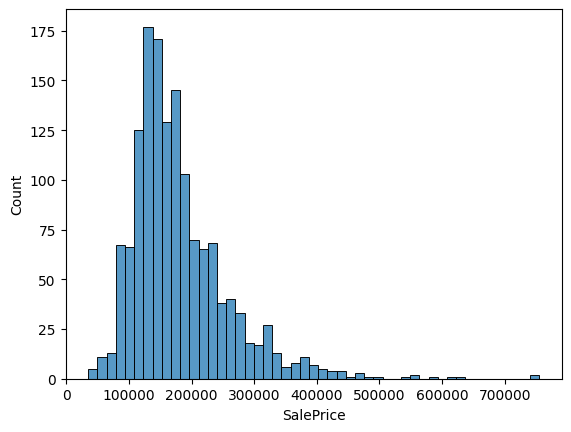

In [18]:
#plotando histogram com seaborn
sns.histplot(df["SalePrice"])

<Axes: >

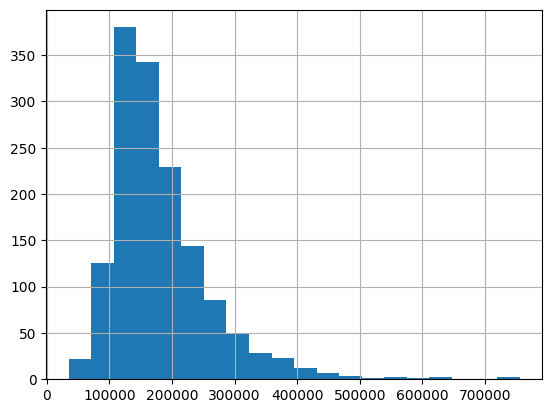

In [19]:
#plotando histogram nativo de python
df["SalePrice"].hist(bins = 20)

## Log

In [20]:
# criamos uma nova coluna para armazenar a transformação dos valores de "SalePrice" em seus equivalentes logarítmicos na base 10.
df["log_SalePrice"] = np.log10(df['SalePrice'])
df

,Unnamed: 0,SalePrice,OverallQual,OverallCond,BedroomAbvGr,TotRmsAbvGrd,GrLivArea,TotalBsmtSF,YearBuilt,MSZoning,Utilities,BldgType,log_SalePrice
0,0,208500,7,5,3,8,1710,856,2003,RL,AllPub,1Fam,5.319106
1,1,181500,6,8,3,6,1262,1262,1976,RL,AllPub,1Fam,5.258877
2,2,223500,7,5,3,6,1786,920,2001,RL,AllPub,1Fam,5.349278
3,3,140000,7,5,3,7,1717,756,1915,RL,AllPub,1Fam,5.146128
4,4,250000,8,5,4,9,2198,1145,2000,RL,AllPub,1Fam,5.397940
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1455,175000,6,5,3,7,1647,953,1999,RL,AllPub,1Fam,5.243038
1456,1456,210000,6,6,3,7,2073,1542,1978,RL,AllPub,1Fam,5.322219
1457,1457,266500,7,9,4,9,2340,1152,1941,RL,AllPub,1Fam,5.425697
1458,1458,142125,5,6,2,5,1078,1078,1950,RL,AllPub,1Fam,5.152670


<Axes: xlabel='log_SalePrice', ylabel='Count'>

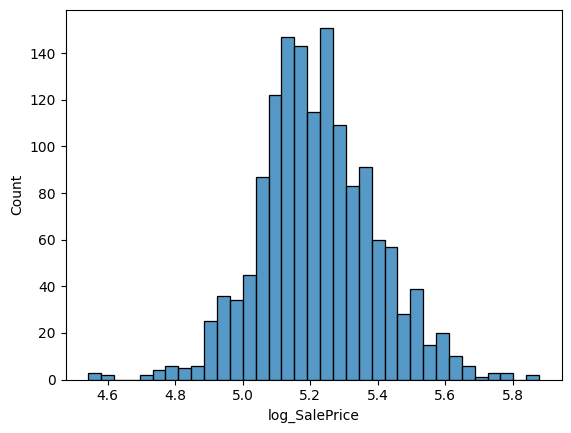

In [21]:
#plotando histogram da nova coluna com seaborn
sns.histplot(df["log_SalePrice"])

In [22]:
# queremos agora verificar o valor do skewness da nova coluna, veja que ele fica bem proximo de 0, o que significa que a curva possui baixa assimetria.

from scipy.stats import skew

skew(df["log_SalePrice"])

np.float64(0.12121036730137275)

## Box Cox

A transformação de Box-Cox é uma técnica estatística que é usada para estabilizar a variância e tornar os dados mais próximos de uma curva normal.

In [23]:
# calculando uma nova coluna para armazenar os valores transformados
lmbda = 0.1

df["BX_SalePrice"] = (df["SalePrice"]**lmbda - 1)/lmbda
df

,Unnamed: 0,SalePrice,OverallQual,OverallCond,BedroomAbvGr,TotRmsAbvGrd,GrLivArea,TotalBsmtSF,YearBuilt,MSZoning,Utilities,BldgType,log_SalePrice,BX_SalePrice
0,0,208500,7,5,3,8,1710,856,2003,RL,AllPub,1Fam,5.319106,24.033813
1,1,181500,6,8,3,6,1262,1262,1976,RL,AllPub,1Fam,5.258877,23.565078
2,2,223500,7,5,3,6,1786,920,2001,RL,AllPub,1Fam,5.349278,24.271077
3,3,140000,7,5,3,7,1717,756,1915,RL,AllPub,1Fam,5.146128,22.704898
4,4,250000,8,5,4,9,2198,1145,2000,RL,AllPub,1Fam,5.397940,24.657242
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1455,175000,6,5,3,7,1647,953,1999,RL,AllPub,1Fam,5.243038,23.442890
1456,1456,210000,6,6,3,7,2073,1542,1978,RL,AllPub,1Fam,5.322219,24.058219
1457,1457,266500,7,9,4,9,2340,1152,1941,RL,AllPub,1Fam,5.425697,24.879457
1458,1458,142125,5,6,2,5,1078,1078,1950,RL,AllPub,1Fam,5.152670,22.754204


<Axes: xlabel='BX_SalePrice', ylabel='Count'>

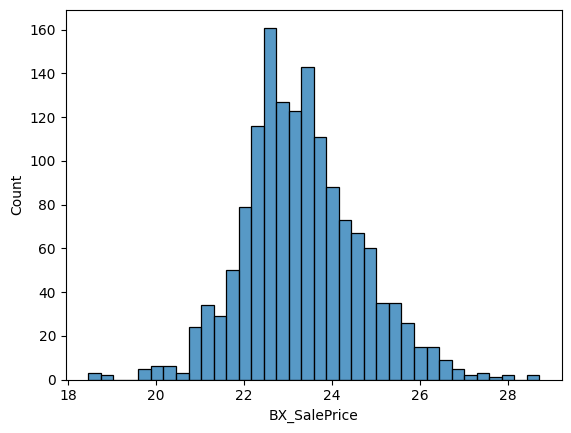

In [24]:
# vizualizando o histograma da coluna com valores trasnformados

sns.histplot(df["BX_SalePrice"])

In [25]:
# determinando o valor do skewness para a nova coluna
skew(df["BX_SalePrice"])

np.float64(0.28641751364562007)

Observe e compare o valor dos dois skewness. na transformação logaritmica, o valor obtido foi menor do que ao aplicar o Box cox

# Sumário

#### **Probabilidade:**

1. **Cálculo z-test:**
```python
   from statsmodels.stats.weightstats import ztest as ztest
   #perform one sample z-test
   ztest(coluna_com_seus_dados, value = valor_a_comparar)
```

2. **Cálculo probabilidade binomial:**
- número de tentativas: n
- número de sucessos: k
- probabilidade de sucesso: p**

   ```python
   binom.cdf(k, n, p)
   ```

3. **Distribuição Normal:**
- Z-score:

   ```python
   z = (dado - média)/ desvio_padrão
   ```
- Probabilidade do Z-Score:

  ```python
  norm.cdf(Z)
  ```


#### **Transformações:**

4. **Transformação Logarítmica:**
  ```python
  df["nome_da_coluna_transformada"] = np.log10(df['nome_da_coluna_a_transformar'])
  ```

5. **Transformação Box-Cox:**

  ```python
  df["BX_SalePrice"] = (df["SalePrice"]**lmbda - 1)/lmbda
  ```
